In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Size of:")
print("Training Dataset:",train_num)
print("Testing Dataset:",test_num)
print("Validation Dataset:",valid_num)

Size of:
Training Dataset: 55000
Testing Dataset: 10000
Validation Dataset: 5000


In [46]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
conv2 = tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool2 = tf.layers.max_pooling2d(inputs=conv2,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool2);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []
sens_list1 = []
init = tf.global_variables_initializer()

Batch_size = [4,8,16,32,64,128,256,512]
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(Batch_size)):
        for j in range(data.train.num_examples // Batch_size[i]):
            x_batch, y_batch = data.train.next_batch(Batch_size[i])
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list1.append(train_loss)
        train_acc_list1.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list1.append(test_loss)
        test_acc_list1.append(test_acc)
        sens_list1.append(sens)
        m = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(m.format(Batch_size[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.03268, Training Accuracy: 100.0%, Test Loss: 0.1218, Test Accuracy:  96.3%, Sensitivity: 0.007473
Batch Size:    8, Training Loss: 0.00727, Training Accuracy: 100.0%, Test Loss: 0.08044, Test Accuracy:  97.5%, Sensitivity: 0.00922
Batch Size:   16, Training Loss: 0.2046, Training Accuracy:  93.8%, Test Loss: 0.06561, Test Accuracy:  98.0%, Sensitivity: 0.008507
Batch Size:   32, Training Loss: 0.06012, Training Accuracy:  96.9%, Test Loss: 0.05543, Test Accuracy:  98.2%, Sensitivity: 0.008002
Batch Size:   64, Training Loss: 0.09327, Training Accuracy:  95.3%, Test Loss: 0.05506, Test Accuracy:  98.2%, Sensitivity: 0.007554
Batch Size:  128, Training Loss: 0.07469, Training Accuracy:  96.9%, Test Loss: 0.05155, Test Accuracy:  98.4%, Sensitivity: 0.008991
Batch Size:  256, Training Loss: 0.04799, Training Accuracy:  98.0%, Test Loss: 0.05081, Test Accuracy:  98.3%, Sensitivity: 0.007935
Batch Size:  512, Training Loss: 0.04543, Training Accuracy:  98.

Text(0.5, 1.0, 'Accuracy vs Batch Size')

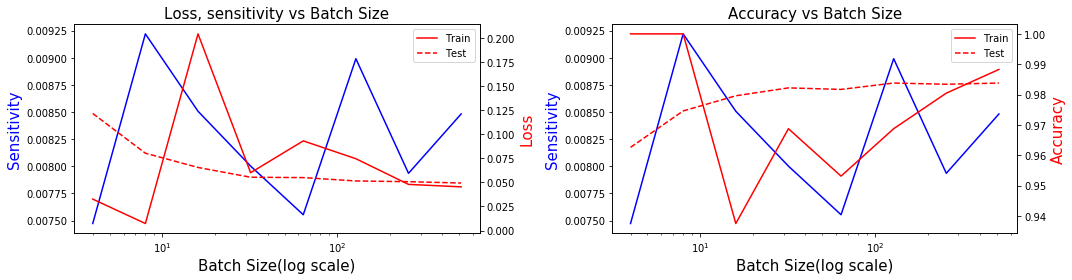

In [48]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(Batch_size,sens_list1,'b')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity',size=15)
axs[0].set_xlabel('Batch Size(log scale)',size=15)
axs[0].yaxis.label.set_color('b')
axs1 = axs[0].twinx()
axs1.plot(Batch_size, train_loss_list1,'r')
axs1.plot(Batch_size, test_loss_list1,'r--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss',size=15)
axs1.yaxis.label.set_color('r')
axs1.legend(['Train','Test'])
axs1.set_title('Loss, sensitivity vs Batch Size',size=15)

axs[1].plot(Batch_size,sens_list1,'b')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity',size=15)
axs[1].yaxis.label.set_color('b')
axs2 = axs[1].twinx()
axs2.plot(Batch_size, train_acc_list1,'r')
axs2.plot(Batch_size, test_acc_list1,'r--')
axs2.set_ylabel('Accuracy',size=15)
axs2.yaxis.label.set_color('r')
axs[1].set_xlabel('Batch Size(log scale)',size=15)
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size',size=15)

In [14]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.leaky_relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.leaky_relu);
h3 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.leaky_relu);
logits = tf.layers.dense(inputs=h3,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []
sens_list2 = []

init = tf.global_variables_initializer()

Batch_size = [4,8,16,32,64,128,256,512]
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(Batch_size)):
        for j in range(data.train.num_examples // Batch_size[i]):
            x_batch, y_batch = data.train.next_batch(Batch_size[i])
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list2.append(train_loss)
        train_acc_list2.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list2.append(test_loss)
        test_acc_list2.append(test_acc)
        sens_list2.append(sens)
        m = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(m.format(Batch_size[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.06049, Training Accuracy: 100.0%, Test Loss: 0.2266, Test Accuracy:  93.6%, Sensitivity: 0.01543
Batch Size:    8, Training Loss: 0.07714, Training Accuracy: 100.0%, Test Loss: 0.1677, Test Accuracy:  95.1%, Sensitivity: 0.01545
Batch Size:   16, Training Loss: 0.03175, Training Accuracy: 100.0%, Test Loss: 0.1511, Test Accuracy:  95.6%, Sensitivity: 0.01638
Batch Size:   32, Training Loss: 0.1614, Training Accuracy:  93.8%, Test Loss: 0.1364, Test Accuracy:  96.0%, Sensitivity: 0.01634
Batch Size:   64, Training Loss: 0.08161, Training Accuracy:  98.4%, Test Loss: 0.1299, Test Accuracy:  96.3%, Sensitivity: 0.01652
Batch Size:  128, Training Loss: 0.08346, Training Accuracy:  96.9%, Test Loss: 0.1263, Test Accuracy:  96.4%, Sensitivity: 0.0167
Batch Size:  256, Training Loss: 0.0699, Training Accuracy:  97.7%, Test Loss: 0.124, Test Accuracy:  96.4%, Sensitivity: 0.01677
Batch Size:  512, Training Loss: 0.08133, Training Accuracy:  98.4%, Test Loss: 

Text(0.5, 1.0, 'Accuracy vs Batch Size')

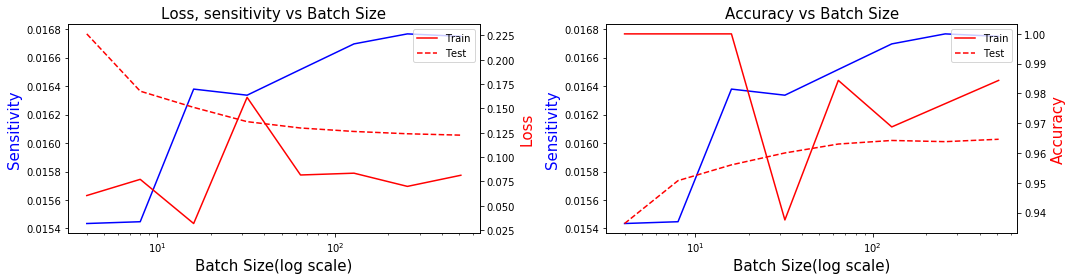

In [36]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(Batch_size,sens_list2,'b')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity',size=15)
axs[0].set_xlabel('Batch Size(log scale)',size=15)
axs[0].yaxis.label.set_color('b')
axs1 = axs[0].twinx()
axs1.plot(Batch_size, train_loss_list2,'r')
axs1.plot(Batch_size, test_loss_list2,'r--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss',size=15)
axs1.yaxis.label.set_color('r')
axs1.legend(['Train','Test'])
axs1.set_title('Loss, sensitivity vs Batch Size',size=15)

axs[1].plot(Batch_size,sens_list2,'b')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity',size=15)
axs[1].yaxis.label.set_color('b')
axs2 = axs[1].twinx()
axs2.plot(Batch_size, train_acc_list2,'r')
axs2.plot(Batch_size, test_acc_list2,'r--')
axs2.set_ylabel('Accuracy',size=15)
axs2.yaxis.label.set_color('r')
axs[1].set_xlabel('Batch Size(log scale)',size=15)
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy vs Batch Size',size=15)

In [17]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=256,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h3,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.005);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list3 = []
train_acc_list3 = []
test_loss_list3 = []
test_acc_list3 = []
sens_list3 = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(Batch_size)):
        for j in range(data.train.num_examples // Batch_size[i]):
            x_batch, y_batch = data.train.next_batch(Batch_size[i])
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list3.append(train_loss)
        train_acc_list3.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list3.append(test_loss)
        test_acc_list3.append(test_acc)
        sens_list3.append(sens)
        m = "Batch Size: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(m.format(Batch_size[i], train_loss, train_acc, test_loss, test_acc, sens))

Batch Size:    4, Training Loss: 0.0008793, Training Accuracy: 100.0%, Test Loss: 0.2459, Test Accuracy:  93.4%, Sensitivity: 0.03306
Batch Size:    8, Training Loss: 0.01737, Training Accuracy: 100.0%, Test Loss: 0.216, Test Accuracy:  94.1%, Sensitivity: 0.03601
Batch Size:   16, Training Loss: 0.02433, Training Accuracy: 100.0%, Test Loss: 0.152, Test Accuracy:  96.1%, Sensitivity: 0.03185
Batch Size:   32, Training Loss: 0.07445, Training Accuracy:  96.9%, Test Loss: 0.147, Test Accuracy:  96.2%, Sensitivity: 0.03525
Batch Size:   64, Training Loss: 0.02533, Training Accuracy: 100.0%, Test Loss: 0.1189, Test Accuracy:  97.0%, Sensitivity: 0.03336
Batch Size:  128, Training Loss: 0.05466, Training Accuracy:  99.2%, Test Loss: 0.1191, Test Accuracy:  97.0%, Sensitivity: 0.03864
Batch Size:  256, Training Loss: 0.03174, Training Accuracy:  98.4%, Test Loss: 0.1193, Test Accuracy:  97.1%, Sensitivity: 0.03892
Batch Size:  512, Training Loss: 0.03909, Training Accuracy:  98.4%, Test Los

Text(0.5, 1.0, 'Accuracy, sensitivity vs Batch Size')

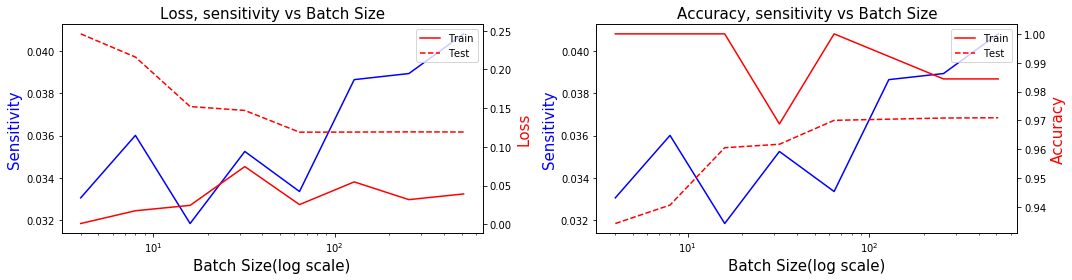

In [49]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(Batch_size,sens_list3,'b')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity',size=15)
axs[0].set_xlabel('Batch Size(log scale)',size=15)
axs[0].yaxis.label.set_color('b')
axs1 = axs[0].twinx()
axs1.plot(Batch_size, train_loss_list3,'r')
axs1.plot(Batch_size, test_loss_list3,'r--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss',size=15)
axs1.yaxis.label.set_color('r')
axs1.legend(['Train','Test'])
axs1.set_title('Loss, sensitivity vs Batch Size',size=15)

axs[1].plot(Batch_size,sens_list3,'b')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity',size=15)
axs[1].yaxis.label.set_color('b')
axs2 = axs[1].twinx()
axs2.plot(Batch_size, train_acc_list3,'r')
axs2.plot(Batch_size, test_acc_list3,'r--')
axs2.set_ylabel('Accuracy',size=15)
axs2.yaxis.label.set_color('r')
axs[1].set_xlabel('Batch Size(log scale)',size=15)
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy, sensitivity vs Batch Size',size=15)

In [54]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

flat1 = tf.layers.flatten(inputs=input_x)
h1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
h2 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
h3 = tf.layers.dense(inputs=h1,units=128,activation=tf.nn.relu);
h4 = tf.layers.dense(inputs=h1,units=64,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=h4,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

# Accuracy
softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list4 = []
train_acc_list4 = []
test_loss_list4 = []
test_acc_list4 = []
sens_list4 = []

init = tf.global_variables_initializer()

lr = [0.15,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
init = tf.global_variables_initializer()
Batchsize = 128

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(lr)):
        for j in range(data.train.num_examples//Batchsize):
            x_batch, y_batch = data.train.next_batch(Batchsize)
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch,learning_rate:lr[i]})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list4.append(train_loss)
        train_acc_list4.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list4.append(test_loss)
        test_acc_list4.append(test_acc)
        sens_list4.append(sens)
        msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(msg.format(lr[i], train_loss, train_acc, test_loss, test_acc, sens))

Learn rate: 0.15, Training Loss: 1.347, Training Accuracy:  45.3%, Test Loss: 1.233, Test Accuracy:  49.6%, Sensitivity: 0.06909
Learn rate:  0.1, Training Loss: 0.9954, Training Accuracy:  64.1%, Test Loss: 0.9971, Test Accuracy:  64.8%, Sensitivity: 0.07446
Learn rate: 0.05, Training Loss: 1.226, Training Accuracy:  63.3%, Test Loss: 0.972, Test Accuracy:  65.0%, Sensitivity: 0.07236
Learn rate: 0.01, Training Loss: 0.8253, Training Accuracy:  75.0%, Test Loss: 0.8999, Test Accuracy:  69.1%, Sensitivity: 0.07901
Learn rate: 0.005, Training Loss: 0.7512, Training Accuracy:  72.7%, Test Loss: 0.8834, Test Accuracy:  70.4%, Sensitivity: 0.07682
Learn rate: 0.001, Training Loss: 0.8901, Training Accuracy:  67.2%, Test Loss: 0.8816, Test Accuracy:  70.6%, Sensitivity: 0.08066
Learn rate: 0.0005, Training Loss: 0.8437, Training Accuracy:  75.8%, Test Loss: 0.8746, Test Accuracy:  70.9%, Sensitivity: 0.08083
Learn rate: 0.0001, Training Loss: 0.8132, Training Accuracy:  75.0%, Test Loss: 0.

Text(0.5, 1.0, 'Accuracy,sensitivity vs Learning rate')

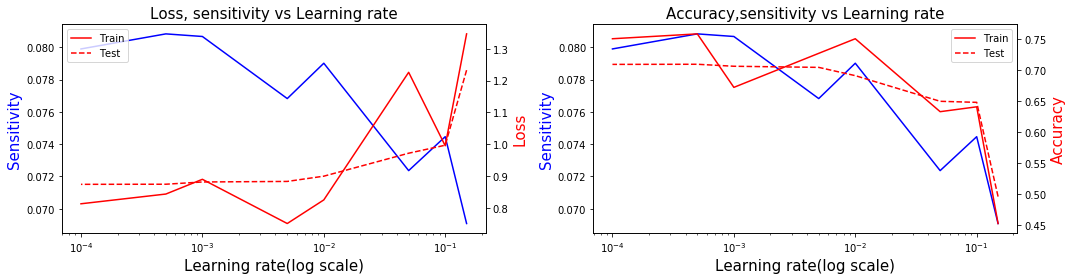

In [55]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr,sens_list4,'b')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity',size=15)
axs[0].set_xlabel('Learning rate(log scale)',size=15)
axs[0].yaxis.label.set_color('b')
axs1 = axs[0].twinx()
axs1.plot(lr, train_loss_list4,'r')
axs1.plot(lr, test_loss_list4,'r--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss',size=15)
axs1.yaxis.label.set_color('r')
axs1.legend(['Train','Test'])
axs1.set_title('Loss, sensitivity vs Learning rate',size=15)

axs[1].plot(lr,sens_list4,'b')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity',size=15)
axs[1].yaxis.label.set_color('b')
axs2 = axs[1].twinx()
axs2.plot(lr, train_acc_list4,'r')
axs2.plot(lr, test_acc_list4,'r--')
axs2.set_ylabel('Accuracy',size=15)
axs2.yaxis.label.set_color('r')
axs[1].set_xlabel('Learning rate(log scale)',size=15)
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy,sensitivity vs Learning rate',size=15)

In [57]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)
learning_rate = tf.placeholder(tf.float32)

conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu);
pool1 = tf.layers.max_pooling2d(inputs=conv1,pool_size=2,strides=2);
flat1 = tf.layers.flatten(pool1);
fc1 = tf.layers.dense(inputs=flat1,units=128,activation=tf.nn.relu);
logits = tf.layers.dense(inputs=fc1,units=num_classes,activation=None);
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=logits);
loss = tf.reduce_mean(cross_entropy);

softmax = tf.nn.softmax(logits=logits);
pred_op = tf.argmax(softmax,dimension=1);
acc_op = tf.reduce_mean(tf.cast(tf.equal(pred_op, y_cls), tf.float32));
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001);
train_op = optimizer.minimize(loss);
sens_op = tf.norm(tf.gradients(loss,input_x))

train_loss_list5 = []
train_acc_list5 = []
test_loss_list5 = []
test_acc_list5 = []
sens_list5 = []
init = tf.global_variables_initializer()

lr = [0.15,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
init = tf.global_variables_initializer()
Batchsize = 128

with tf.Session() as sess:
    sess.run(init)
    for i in range(len(lr)):
        for j in range(data.train.num_examples//Batchsize):
            x_batch, y_batch = data.train.next_batch(Batchsize)
            sess.run(train_op, feed_dict={x: x_batch,y: y_batch,learning_rate:lr[i]})
        train_loss, train_acc = sess.run([loss,acc_op],feed_dict={x:x_batch,y:y_batch})
        train_loss_list5.append(train_loss)
        train_acc_list5.append(train_acc)
        test_loss, test_acc, sens = sess.run([loss,acc_op,sens_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list5.append(test_loss)
        test_acc_list5.append(test_acc)
        sens_list5.append(sens)
        msg = "Learn rate: {0:>4}, Training Loss: {1:>1.4}, Training Accuracy: {2:>6.1%}, Test Loss: {3:>1.4}, Test Accuracy: {4:>6.1%}, Sensitivity: {5:>1.4}"
        print(msg.format(lr[i], train_loss, train_acc, test_loss, test_acc, sens))

Learn rate: 0.15, Training Loss: 0.4351, Training Accuracy:  89.1%, Test Loss: 0.3513, Test Accuracy:  90.8%, Sensitivity: 0.008851
Learn rate:  0.1, Training Loss: 0.3369, Training Accuracy:  90.6%, Test Loss: 0.25, Test Accuracy:  93.0%, Sensitivity: 0.009935
Learn rate: 0.05, Training Loss: 0.1672, Training Accuracy:  94.5%, Test Loss: 0.202, Test Accuracy:  94.3%, Sensitivity: 0.01009
Learn rate: 0.01, Training Loss: 0.08955, Training Accuracy:  98.4%, Test Loss: 0.1718, Test Accuracy:  95.1%, Sensitivity: 0.01012
Learn rate: 0.005, Training Loss: 0.173, Training Accuracy:  95.3%, Test Loss: 0.1476, Test Accuracy:  95.8%, Sensitivity: 0.009966
Learn rate: 0.001, Training Loss: 0.1102, Training Accuracy:  97.7%, Test Loss: 0.1272, Test Accuracy:  96.4%, Sensitivity: 0.009684
Learn rate: 0.0005, Training Loss: 0.05714, Training Accuracy:  98.4%, Test Loss: 0.1134, Test Accuracy:  96.7%, Sensitivity: 0.009514
Learn rate: 0.0001, Training Loss: 0.1112, Training Accuracy:  97.7%, Test L

Text(0.5, 1.0, 'Accuracy,sensitivity vs Learning rate')

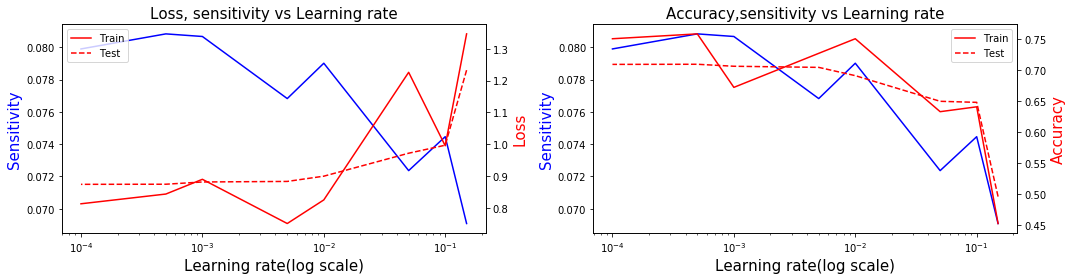

In [58]:
fig,axs=plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_tight_layout('tight')
axs[0].plot(lr,sens_list4,'b')
axs[0].set_xscale('log')
axs[0].set_ylabel('Sensitivity',size=15)
axs[0].set_xlabel('Learning rate(log scale)',size=15)
axs[0].yaxis.label.set_color('b')
axs1 = axs[0].twinx()
axs1.plot(lr, train_loss_list4,'r')
axs1.plot(lr, test_loss_list4,'r--')
axs1.set_xscale('log')
axs1.set_ylabel('Loss',size=15)
axs1.yaxis.label.set_color('r')
axs1.legend(['Train','Test'])
axs1.set_title('Loss, sensitivity vs Learning rate',size=15)

axs[1].plot(lr,sens_list4,'b')
axs[1].set_xscale('log')
axs[1].set_ylabel('Sensitivity',size=15)
axs[1].yaxis.label.set_color('b')
axs2 = axs[1].twinx()
axs2.plot(lr, train_acc_list4,'r')
axs2.plot(lr, test_acc_list4,'r--')
axs2.set_ylabel('Accuracy',size=15)
axs2.yaxis.label.set_color('r')
axs[1].set_xlabel('Learning rate(log scale)',size=15)
axs2.legend(['Train','Test'])
axs2.set_title('Accuracy,sensitivity vs Learning rate',size=15)